In [1]:
import tensorflow as tf
from tensorflow import keras
(train_data, train_targets), (test_data, test_targets) =keras.datasets.boston_housing.load_data()

In [2]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

In [3]:
test_data -= mean
test_data /= std

데이터 표준화하기

In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [5]:
model = models.Sequential()
# Regularizer 더하기
# https://keras.io/api/layers/regularizers/
model.add(layers.Dense(64, activation = 'relu', kernel_regularizer=regularizers.l2(0.1), input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [7]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [8]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
checkpoint_filepath = './temp/checkpoint'
mc = ModelCheckpoint(checkpoint_filepath, monitor='val_loss', mode='min', 
                     save_weights_only=True, save_best_only=True)

In [9]:
adam = tf.keras.optimizers.Adam(learning_rate=0.1)

In [10]:
model.compile(optimizer=adam, loss='mse')

In [11]:
history = model.fit(train_data, train_targets, validation_split=0.2, epochs=200, batch_size=32, callbacks=[es, mc])

Epoch 1/200
11/11 [==============================] - 1s 41ms/step - loss: 587.9581 - val_loss: 498.5112
Epoch 2/200
11/11 [==============================] - 0s 27ms/step - loss: 281.2469 - val_loss: 142.4443
Epoch 3/200
11/11 [==============================] - 0s 27ms/step - loss: 94.7169 - val_loss: 48.1269
Epoch 4/200
11/11 [==============================] - 0s 16ms/step - loss: 85.8867 - val_loss: 59.6899
Epoch 5/200
11/11 [==============================] - 0s 22ms/step - loss: 58.1474 - val_loss: 57.0787
Epoch 6/200
11/11 [==============================] - 0s 14ms/step - loss: 43.9908 - val_loss: 32.9538
Epoch 7/200
11/11 [==============================] - 0s 11ms/step - loss: 34.3124 - val_loss: 33.1721
Epoch 8/200
11/11 [==============================] - 0s 16ms/step - loss: 30.3961 - val_loss: 29.9943
Epoch 9/200
11/11 [==============================] - 0s 10ms/step - loss: 25.4414 - val_loss: 27.1433
Epoch 10/200
11/11 [==============================] - 0s 10ms/step - loss: 23.

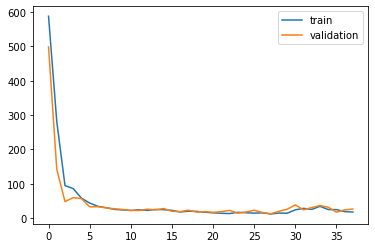

In [12]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

In [13]:
model.load_weights(checkpoint_filepath)

In [14]:
y_pred = model.predict(test_data)

4/4 [==============================] - 0s 1ms/step


In [15]:
from sklearn.metrics import r2_score
r2_score(test_targets, y_pred)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


0.7866085165806573

In [16]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_targets, y_pred)**0.5

4.214680097133731